In [181]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import pandas as pd
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [182]:
# get Data and convert to CSV

path = "CMAPSSData"
new_path = "Processed_Data"
file_list = os.listdir(path)[2:]

true_RUL_files = file_list[:4]
test_files = file_list[4:8]
train_files = file_list[8:12]

# process RUL text files into CSV
for file_name in true_RUL_files:
    df = pd.read_csv(path+"/"+file_name,names=["RUL"])

    new_file_name = file_name.replace(".txt",".csv")
    df.to_csv(new_path+"/"+new_file_name,index=False)

# column names for the next two file categories
column_names = ["ID", "cycle", "op_setting_1", "op_setting_2", "op_setting_3", "s_1", "s_2", "s_3", "s_4", "s_5", "s_6", "s_7", "s_8", "s_9", "s_10", "s_11", "s_12", "s_13", "s_14", "s_15", "s_16","s_17","s_18","s_19","s_20","s_21"]

# process test files into CSV
for file_name in test_files:
    df = pd.read_csv(path+"/"+file_name,sep=" ", names=column_names,index_col=False) #type: ignore

    new_file_name = file_name.replace(".txt",".csv")
    df.to_csv(new_path+"/"+new_file_name,index=False)

# process train files into CSV
for file_name in train_files:
    df = pd.read_csv(path+"/"+file_name,sep=" ", names=column_names,index_col=False) #type: ignore

    new_file_name = file_name.replace(".txt",".csv")
    df.to_csv(new_path+"/"+new_file_name,index=False)

C:\Users\Daniel Hernandez\AppData\Local\Temp\ipykernel_35384\22528512.py:23: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(path+"/"+file_name,sep=" ", names=column_names,index_col=False) #type: ignore
C:\Users\Daniel Hernandez\AppData\Local\Temp\ipykernel_35384\22528512.py:23: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(path+"/"+file_name,sep=" ", names=column_names,index_col=False) #type: ignore
C:\Users\Daniel Hernandez\AppData\Local\Temp\ipykernel_35384\22528512.py:23: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(path+"/"+file_name,sep=" ", names=column_names,index_col=False) #type: ignore
C:\Users\Daniel Hernandez\AppData\Local\Temp\ipykernel_35384\22528512.py:23: ParserWarning: Length of header 

In [183]:
train_df = pd.read_csv(f"{new_path}/train_FD001.csv")
test_df = pd.read_csv(f"{new_path}/test_FD001.csv")
train_df

,ID,cycle,op_setting_1,op_setting_2,op_setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [184]:
# generate classification targets for the data
train_df.sort_values(['ID','cycle'], inplace=True)
test_df.sort_values(['ID','cycle'], inplace=True)

rul1 = pd.DataFrame(train_df.groupby('ID')['cycle'].max()).reset_index()
rul2 = pd.DataFrame(test_df.groupby('ID')['cycle'].max()).reset_index()
rul1.columns = ['ID', 'max']
rul2.columns = ['ID', 'max']

train_df = train_df.merge(rul1, on=['ID'], how='left')
test_df = test_df.merge(rul2, on=['ID'], how='left')

train_df['RUL'] = train_df['max'] - train_df['cycle']
test_df['RUL'] = test_df['max'] - test_df['cycle']

train_df.drop('max', axis=1, inplace=True)
test_df.drop('max', axis=1, inplace=True)

w1 = 30
train_df['failure_within_w1'] = np.where(train_df['RUL'] <= w1, 1, 0 )
test_df['failure_within_w1'] = np.where(test_df['RUL'] <= w1, 1, 0 )

In [185]:
train_df

,ID,cycle,op_setting_1,op_setting_2,op_setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL,failure_within_w1
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4,1
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3,1
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2,1
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1,1


In [186]:
# Normalize the Data
# seperate data that is going to be normalized
cols_normalize = train_df.columns.difference(['ID','cycle','RUL','failure_within_w1'])
cols_normalize = test_df.columns.difference(['ID','cycle','RUL','failure_within_w1'])

# normalize
scaler = preprocessing.StandardScaler()
norm_train_df = pd.DataFrame(scaler.fit_transform(train_df[cols_normalize]), columns=cols_normalize, index=train_df.index)
norm_test_df = pd.DataFrame(scaler.fit_transform(test_df[cols_normalize]), columns=cols_normalize, index=test_df.index)

# Join the normalized and non-normalized data.
train_join_df = train_df[['ID','cycle','RUL','failure_within_w1']].join(norm_train_df)
test_join_df = test_df[['ID','cycle','RUL','failure_within_w1']].join(norm_test_df)


train_df = train_join_df.reindex(columns = train_df.columns)
test_df = test_join_df.reindex(columns = test_df.columns)

In [187]:
train_df

,ID,cycle,op_setting_1,op_setting_2,op_setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL,failure_within_w1
0,1,1,-0.315980,-1.372953,0.0,0.0,-1.721725,-0.134255,-0.925936,-1.776357e-15,...,-0.269071,-0.603816,-1.387779e-17,-0.781710,0.0,0.0,1.348493,1.194427,191,0
1,1,2,0.872722,-1.031720,0.0,0.0,-1.061780,0.211528,-0.643726,-1.776357e-15,...,-0.642845,-0.275852,-1.387779e-17,-0.781710,0.0,0.0,1.016528,1.236922,190,0
2,1,3,-1.961874,1.015677,0.0,0.0,-0.661813,-0.413166,-0.525953,-1.776357e-15,...,-0.551629,-0.649144,-1.387779e-17,-2.073094,0.0,0.0,0.739891,0.503423,189,0
3,1,4,0.324090,-0.008022,0.0,0.0,-0.661813,-1.261314,-0.784831,-1.776357e-15,...,-0.520176,-1.971665,-1.387779e-17,-0.781710,0.0,0.0,0.352598,0.777792,188,0
4,1,5,-0.864611,-0.690488,0.0,0.0,-0.621816,-1.251528,-0.301518,-1.776357e-15,...,-0.521748,-0.339845,-1.387779e-17,-0.136018,0.0,0.0,0.463253,1.059552,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.178822,-1.031720,0.0,0.0,1.618000,1.216258,2.188375,-1.776357e-15,...,-0.322542,1.425294,-1.387779e-17,2.446751,0.0,0.0,-1.805173,-2.921113,4,1
20627,100,197,-0.727453,-1.714186,0.0,0.0,1.717992,2.279706,2.738351,-1.776357e-15,...,-0.380207,1.913240,-1.387779e-17,1.155367,0.0,0.0,-2.856395,-1.203764,3,1
20628,100,198,0.186933,-0.008022,0.0,0.0,1.478011,1.946971,2.138377,-1.776357e-15,...,-0.141684,3.265092,-1.387779e-17,3.092444,0.0,0.0,-2.081810,-3.292481,2,1
20629,100,199,-0.498857,1.015677,0.0,0.0,1.098043,2.403666,1.955051,-1.776357e-15,...,-0.233948,2.579834,-1.387779e-17,1.155367,0.0,0.0,-2.911722,-2.085072,1,1


In [188]:
# data analysis
sensor_cols = train_df.columns[5:26]
sensor_cols

Index(['s_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19',
       's_20', 's_21'],
      dtype='object')

<Axes: >

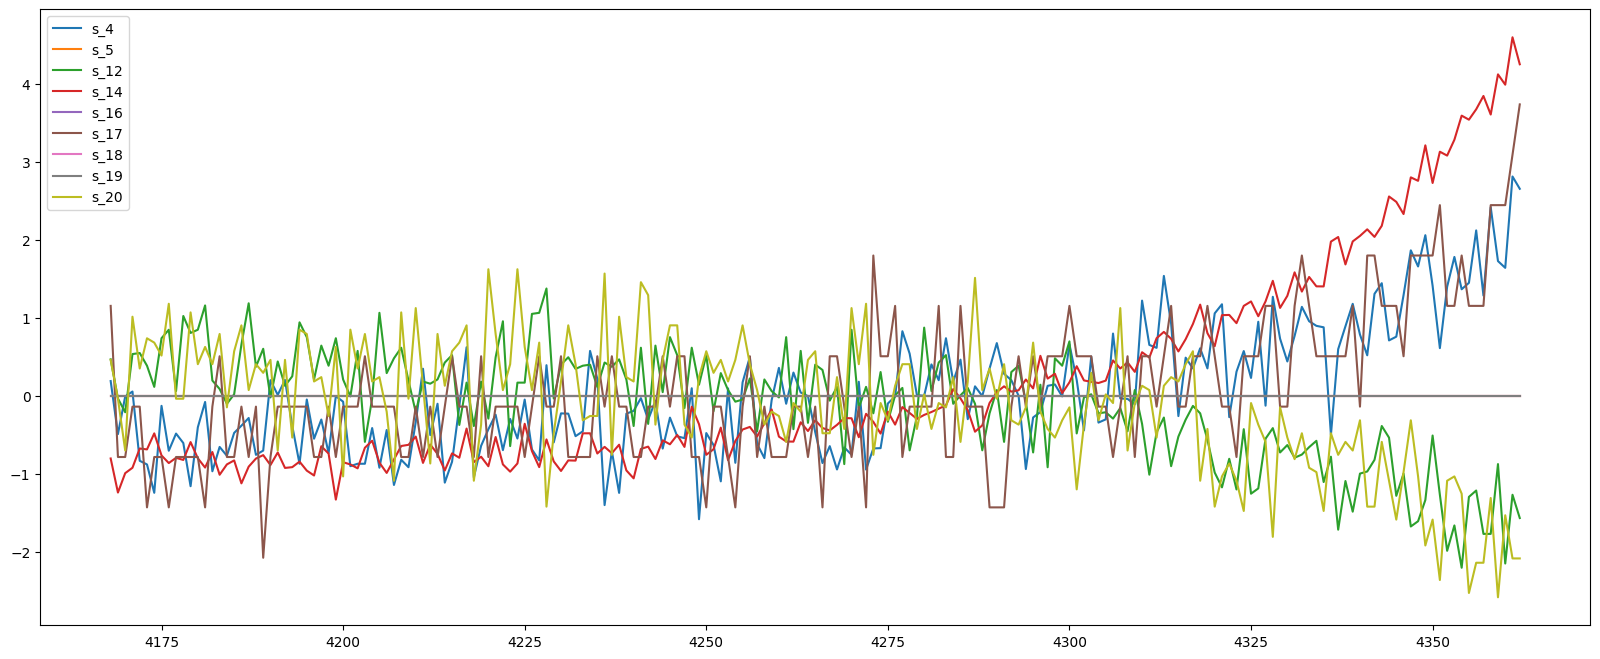

In [189]:
train_df[train_df.ID==21][['s_4', 's_5','s_12', 's_14', 's_16', 's_17', 's_18', 's_19','s_20']].plot(figsize=(20, 8),legend=True)

In [190]:
# training SVM model
# train with sensors
X_train = train_df[sensor_cols].values
y_train = train_df[["failure_within_w1"]].values

# test with sensors
X_test = test_df[sensor_cols].values
y_test = test_df[["failure_within_w1"]].values

model = SVC(C=1,kernel="poly")
model.fit(X_train, np.ravel(y_train))

y_pred = model.predict(X_test)

score = accuracy_score(y_test,y_pred)

In [191]:
score

0.803909590714722

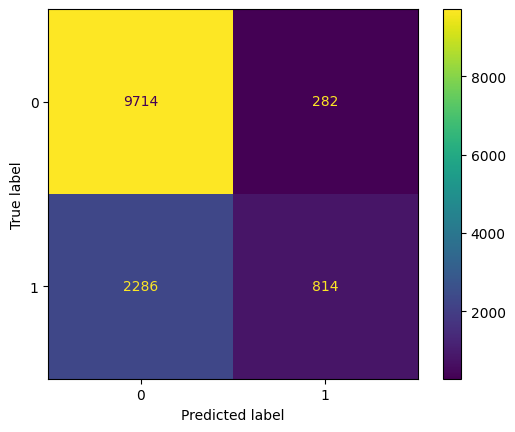

In [192]:
cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()